In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score


In [40]:
df =  pd.read_csv('Social_Network_Ads.csv')
df.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [42]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [43]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [44]:
df.shape

(400, 3)

In [45]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [46]:
# data['']

In [47]:
x = df.iloc[:,2:4]

In [48]:
y = df.iloc[:,2]


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [50]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [51]:
lr = LogisticRegression(random_state = 0,solver = 'lbfgs')
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
       
print(x_test[:10])
print('-'*15)
print(pred[:10])

[[-0.73918317]
 [ 1.35284466]
 [-0.73918317]
 [ 1.35284466]
 [-0.73918317]
 [-0.73918317]
 [ 1.35284466]
 [-0.73918317]
 [-0.73918317]
 [-0.73918317]]
---------------
[0 1 0 1 0 0 1 0 0 0]


In [52]:
print(pred[:20])
print('-'*15)
print(y_test[:20])

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1]
---------------
209    0
280    1
33     0
210    1
93     0
84     0
329    1
94     0
266    0
126    0
9      0
361    1
56     0
72     0
132    0
42     0
278    1
376    0
231    0
385    1
Name: Purchased, dtype: int64


In [53]:

matrix = confusion_matrix(y_test,pred,labels = lr.classes_)
print(matrix)

tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)

[[63  0]
 [ 0 37]]


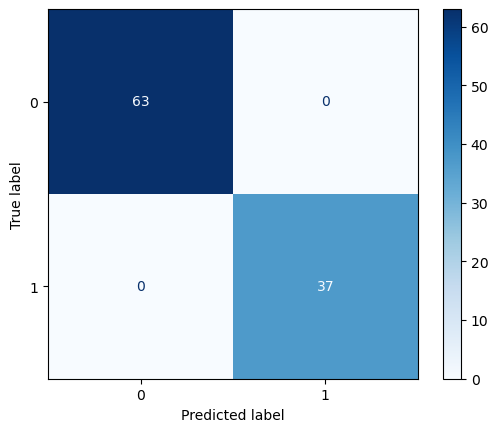

In [54]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=lr.classes_)
conf_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [55]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        37

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [56]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test,pred)))
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Sensitivity (Recall or True positive rate) :',tp/(tp+fn))
print('Specificity (True negative rate) :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp))


Accuracy: 1.00
Error Rate:  0.0
Sensitivity (Recall or True positive rate) : 1.0
Specificity (True negative rate) : 1.0
Precision (Positive predictive value) : 1.0
False Positive Rate : 0.0
